In [1]:
import pandas as pd

In [2]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))

from src import load_dataset, get_features_and_target, create_train_test_split


In [3]:
# Test the flow
path = "../data/cleaned_data/final_dataset.csv"

df = load_dataset(path)
print(f"Loaded data: {df.shape}")

X, y = get_features_and_target(df)
print(f"Features: {X.shape}, Target: {y.shape}")

X_train, X_test, y_train, y_test = create_train_test_split(X, y, stratify_by="Seniority")
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Loaded data: (366, 12)
Features: (366, 11), Target: (366,)
Train: (292, 11), Test: (74, 11)


In [4]:
X_train

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
119,Female,Bachelor's,Senior,Sales & Marketing,Management,42.0,17.0,34,15,7,4
243,Female,Bachelor's,Junior,Sales & Marketing,Support,30.0,2.0,25,11,5,2
242,Male,Master's,Director,Finance & Operations,Leadership,47.0,20.0,32,13,12,1
301,Male,Master's,Director,Sales & Marketing,Sales/Marketing,47.0,19.0,29,16,7,2
309,Female,Bachelor's,Junior,People & Support,Support,30.0,2.0,39,15,7,1
...,...,...,...,...,...,...,...,...,...,...,...
76,Female,Bachelor's,Senior,Finance & Operations,Management,50.0,22.0,25,14,12,1
241,Female,Bachelor's,Senior,Management,Support,41.0,11.0,29,13,11,2
11,Female,Bachelor's,Senior,People & Support,Management,48.0,18.0,33,14,12,0
189,Male,Bachelor's,Senior,Product & Design,Management,34.0,7.0,32,13,7,4


---

# Dummy model

In [5]:
from src import dummy_model

In [6]:
# Create and train dummy model
dummy = dummy_model(strategy='median')
dummy.fit(X_train, y_train)

In [7]:
metrics = dummy.evaluate(X_test, y_test)
print(f"Dummy Model RMSE: {metrics['rmse']:.0f}")
print(f"Dummy Model R²: {metrics['r2']:.3f}")

Dummy Model RMSE: 50897
Dummy Model R²: -0.021


In [8]:
# Model info
info = dummy.get_model_info()
print(f"Model info: {info}")

Model info: {'model_type': 'dummy_model', 'is_fitted': True, 'model_params': {'strategy': 'median'}}


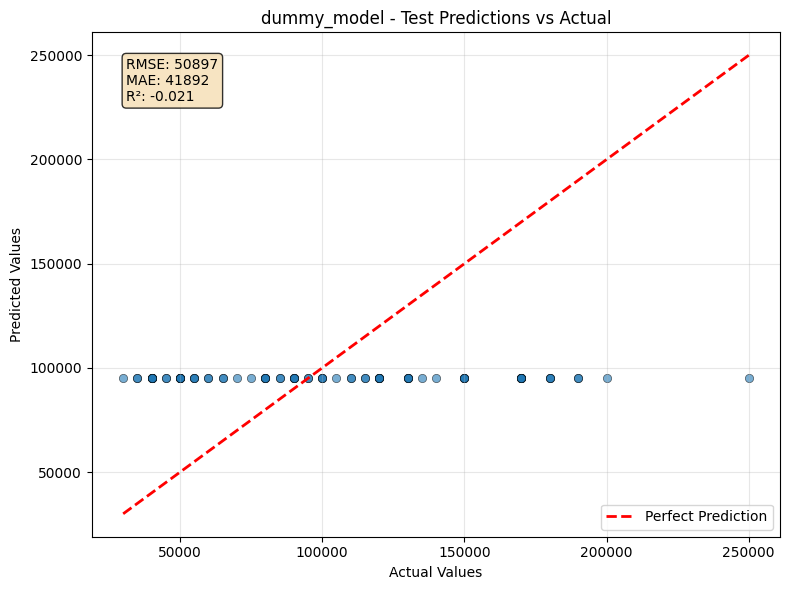

In [9]:
# Evaluate and plot
#print("Dummy Model Metrics:", dummy.evaluate(X_test, y_test))
dummy.plot_predictions(X_test, y_test, 'Test')


---

# Linear Regression

- Approaches. 
  - Ordinary Least Squares (OLS)
  - Gradient Descent
- Assumptions.
    - Linearity
    - Independence
    - Homoscedasticity
    - Normality of errors
- Evaluation metrics.
    - R-squared
    - Adjusted R-squared
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Regularization.
    - Lasso Regression (L1 regularization)
    - Ridge Regression (L2 regularization)



In [10]:
from src.models import LinearModel

### Basic OLS

In [ ]:
# Basic OLS without feature selection
ols_basic = LinearModel(algorithm='ols')
ols_basic.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [12]:
# Evaluate
metrics_ols = ols_basic.evaluate(X_test, y_test)
print(f"OLS Basic - RMSE: {metrics_ols['rmse']:.0f}, R²: {metrics_ols['r2']:.3f}")


OLS Basic - RMSE: 22742, R²: 0.796


In [13]:
# Model info
info = ols_basic.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 21


In [16]:
feature_imp = ols_basic.get_feature_importance()
feature_imp


,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,52118.228613,52118.228613
17,cat__Role_Leadership,48381.348693,48381.348693
5,cat__Seniority_Junior,-46552.776458,46552.776458
19,cat__Role_Sales/Marketing,44815.661276,44815.661276
4,cat__Seniority_Director,25441.559303,25441.559303
18,cat__Role_Management,14405.259107,14405.259107
2,cat__Education Level_Master's,13822.022604,13822.022604
16,cat__Role_Individual Contributor,-8644.393008,8644.393008
9,cat__Area_Other,-8405.113537,8405.113537
8,cat__Area_Management,-6773.907735,6773.907735


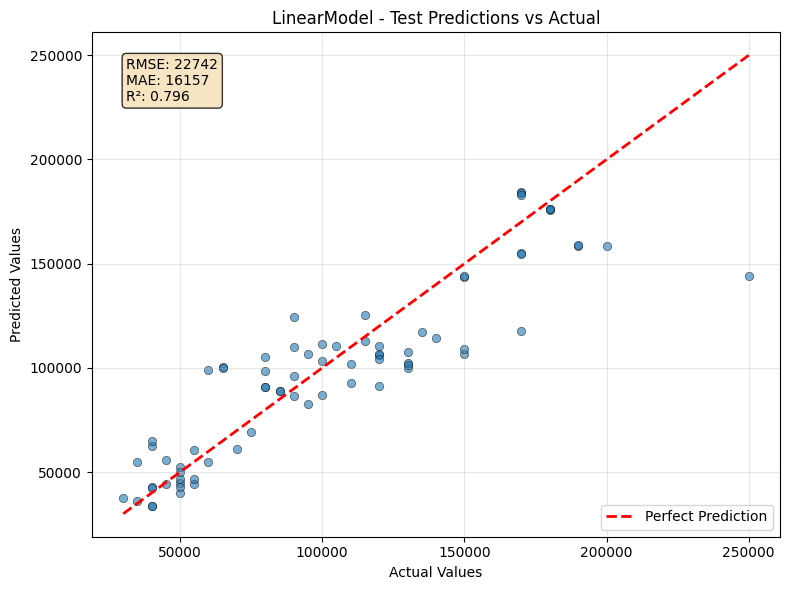

In [17]:
ols_basic.plot_predictions(X_test, y_test, 'Test')

---

### SGD Regression


In [21]:
sgd_reg = LinearModel(algorithm='sgd')
sgd_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
After k-best selection: 27 features
Removed feature_0 (VIF: 142.11)
Removed feature_12 (VIF: 28.11)
Removed feature_2 (VIF: 15.20)
Removed feature_1 (VIF: 14.26)
Removed feature_3 (VIF: 11.67)
Removed feature_4 (VIF: 6.43)
After VIF check: 21 features


In [22]:
# Evaluate
metrics_sgd = sgd_reg.evaluate(X_test, y_test)
print(f"SGD regression - RMSE: {metrics_sgd['rmse']:.0f}, R²: {metrics_sgd['r2']:.3f}")


SGD regression - RMSE: 23519, R²: 0.782


In [23]:
feature_imp_sgd = sgd_reg.get_feature_importance()
feature_imp_sgd

,feature,coefficient,abs_coefficient
3,cat__Education Level_PhD,53531.086348,53531.086348
5,cat__Seniority_Junior,-46208.585274,46208.585274
17,cat__Role_Leadership,43315.431039,43315.431039
4,cat__Seniority_Director,30005.205152,30005.205152
19,cat__Role_Sales/Marketing,28763.932670,28763.932670
2,cat__Education Level_Master's,14659.179644,14659.179644
18,cat__Role_Management,12451.476244,12451.476244
13,cat__Area_Software/data,10473.855871,10473.855871
16,cat__Role_Individual Contributor,-8781.798297,8781.798297
10,cat__Area_People & Support,6701.873043,6701.873043


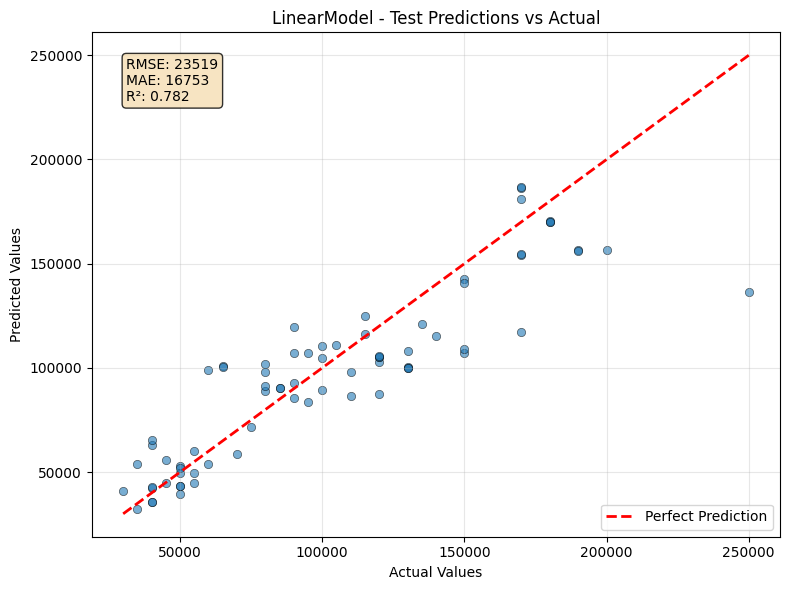

In [24]:
sgd_reg.plot_predictions(X_test, y_test, 'Test')

---

### Lasso Regression

In [46]:
lasso_reg = LinearModel(algorithm='lasso', alpha = 1.2, k_best=10)
lasso_reg.fit(X_train, y_train)

After encoding: 27 features
  - Numerical features (scaled): 6
  - One-hot features (not scaled): 21
Selected 10 best features from 27 features
After k-best selection: 10 features
Removed feature_0 (VIF: 131.09)
Removed feature_1 (VIF: 13.96)
After VIF check: 8 features


In [47]:
metrics_lasso = lasso_reg.evaluate(X_test, y_test)
print(f"Lasso regression - RMSE: {metrics_lasso['rmse']:.0f}, R²: {metrics_lasso['r2']:.3f}")


Lasso regression - RMSE: 23392, R²: 0.784


In [48]:
# Model info
info = lasso_reg.get_model_info()
print(f"Features: {info['n_features_after_encoding']} → {info['n_features_final']}")

Features: 27 → 8


In [49]:
feature_imp_lasso = lasso_reg.get_feature_importance()
feature_imp_lasso

,feature,coefficient,abs_coefficient
3,cat__Seniority_Junior,-75914.887406,75914.887406
1,cat__Education Level_PhD,44912.959549,44912.959549
6,cat__Role_Leadership,33070.678990,33070.678990
4,cat__Seniority_Senior,-25878.295676,25878.295676
5,cat__Role_Individual Contributor,-15993.417103,15993.417103
0,cat__Education Level_Master's,13671.979368,13671.979368
7,cat__Role_Support,-12686.626897,12686.626897
2,cat__Seniority_Director,12377.000116,12377.000116


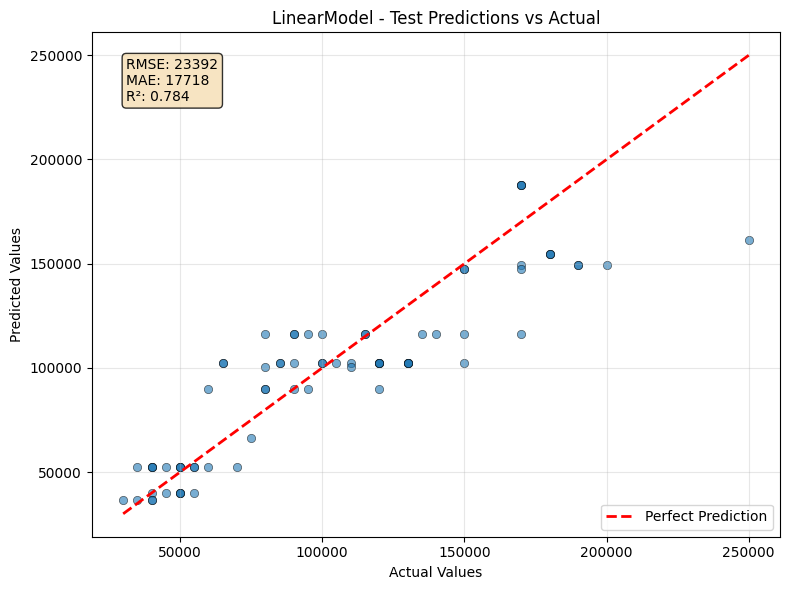

In [50]:
lasso_reg.plot_predictions(X_test, y_test, 'Test')

In [51]:
lasso_reg.get_model_info()

{'model_type': 'LinearModel',
 'is_fitted': True,
 'model_params': {'alpha': 1.2,
  'algorithm': 'lasso',
  'vif_threshold': 5.0,
  'k_best': 10},
 'n_features_after_encoding': 27,
 'n_features_after_kbest': 10,
 'n_features_final': 8,
 'n_numerical_features_scaled': 6,
 'n_onehot_features_not_scaled': 21,
 'features_removed_by_kbest': 17,
 'features_removed_by_vif': 2}

In [52]:
df[df['Salary'] > 200000]

,Age,Gender,Education Level,Years of Experience,noun_count,verb_count,adj_count,adv_count,Seniority,Area,Role,Salary
30,50.0,Male,Bachelor's,25.0,28,15,9,2,C-level,Business,Leadership,250000.0
83,52.0,Male,PhD,24.0,35,16,7,2,C-level,Software/data,Leadership,250000.0
105,44.0,Male,PhD,16.0,33,14,4,2,C-level,Software/data,Leadership,220000.0


In [53]:
X_test.loc[[30]]

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
30,Male,Bachelor's,C-level,Business,Leadership,50.0,25.0,28,15,9,2


In [54]:
X_train.loc[[83,105]]

,Gender,Education Level,Seniority,Area,Role,Age,Years of Experience,noun_count,verb_count,adj_count,adv_count
83,Male,PhD,C-level,Software/data,Leadership,52.0,24.0,35,16,7,2
105,Male,PhD,C-level,Software/data,Leadership,44.0,16.0,33,14,4,2


---